# visual entropy definition

TODO: correct and finish

0.4
0.39999999999999997


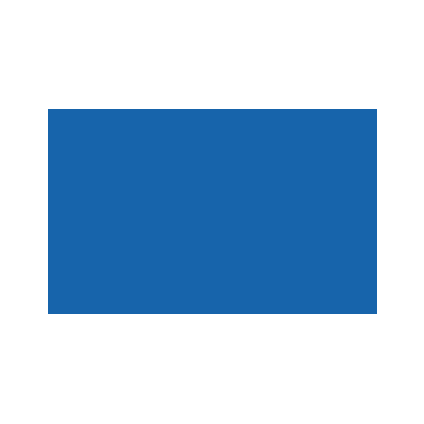

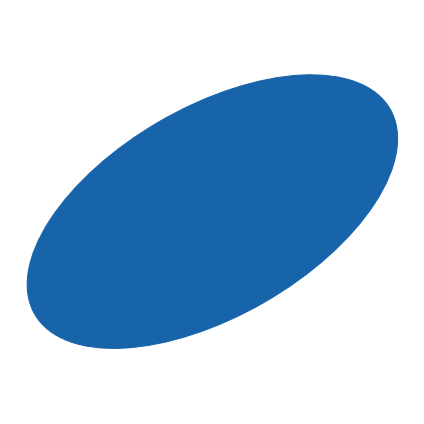

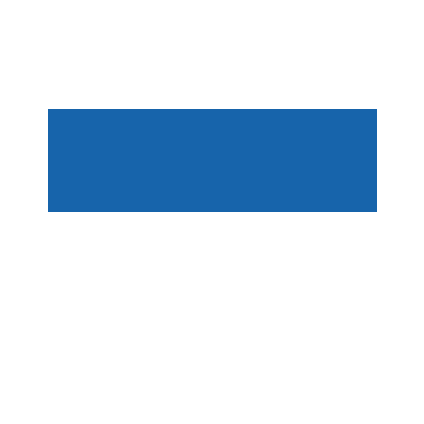

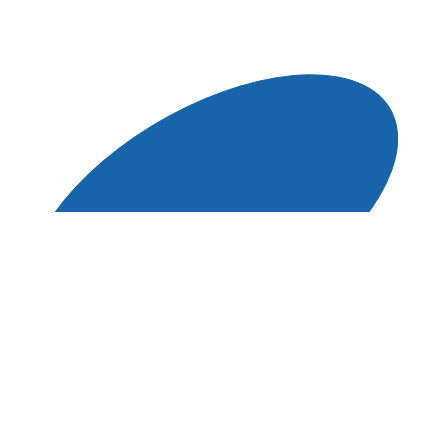

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.cm import get_cmap
from scipy.stats import multivariate_normal

cmap = get_cmap('Blues_r')
color = cmap(0.2)



a1 = 0.8 # rectangle axis 1
b1 = 0.5  # rectangle axis 2

a2 = a1 / np.pi # ellipse half long axis
b2 = b1 * 1 # ellipse half short axis


def vol_rect(a, b):
    return a * b

def vol_ell(a, b):
    return np.pi * a * b

print(vol_rect(a1, b1))
print(vol_ell(a2, b2))

artists = [
    mpatches.Rectangle((0.5 - a1/2, 0.5 - b1/2), a1, b1, ec="none", color=color),
    mpatches.Ellipse((0.5, 0.5), a2*2, b2*2, angle=-60, color=color),
]

names = ["rect1.PNG", "ellipse1.PNG"]

for i, (artist, name) in enumerate(zip(artists, names)):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.add_artist(artist)
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight")
    plt.show()



fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.add_artist(mpatches.Rectangle((0.5 - a1/2, 0.5), a1, b1 / 2, ec="none", color=color))
ax.set_axis_off()
plt.tight_layout()
plt.savefig("rect2.PNG", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.add_artist(mpatches.Ellipse((0.5, 0.5), a2*2, b2*2, angle=-60, color=color))
ax.add_artist(mpatches.Rectangle((0, 0), 1, 0.5, ec="none", color="white"))
ax.set_axis_off()
plt.tight_layout()
plt.savefig("ellipse2.PNG", bbox_inches="tight")
plt.show()


In [24]:
# define normalized 2D gaussian
x = np.linspace(0, 1)
y = np.linspace(0, 1)
XX, YY = np.meshgrid(x, y)

XX.shape


(50, 50)

In [25]:

XXX = np.hstack((XX.reshape((-1, 1)), YY.reshape((-1, 1))))
XXX.shape


(2500, 2)

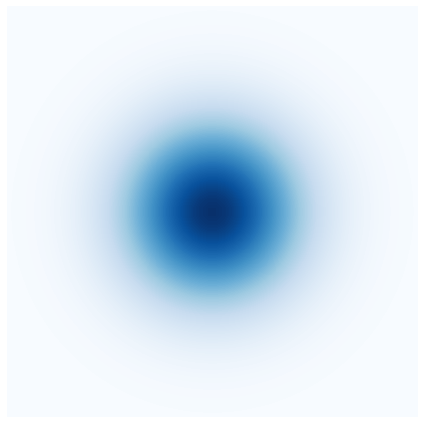

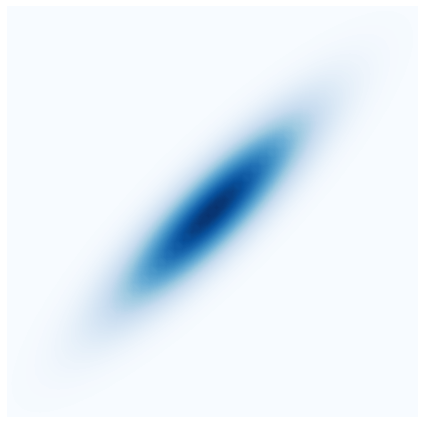

In [27]:

mean = 0.5 * np.ones((2,))

sigma = np.sqrt(a2 * b2 / (2 * np.e))
corr = np.sqrt(0.75)

cov1 = sigma**2 * np.eye(2)

cov2 = cov1*1
cov2[1,0] += np.sqrt(cov2[0,0]) * np.sqrt(cov2[0,0]) * corr
cov2[0,1] += np.sqrt(cov2[0,0]) * np.sqrt(cov2[0,0]) * corr

h1 = multivariate_normal(mean, cov1).pdf(XXX).reshape((50, 50))
h2 = multivariate_normal(mean, cov2).pdf(XXX).reshape((50, 50))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cs = plt.contourf(x, y, -h1, levels=200, cmap=cmap)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("gauss1.PNG", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cs = plt.contourf(x, y, -h2, levels=200, cmap=cmap)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("gauss2.PNG", bbox_inches="tight")
plt.show()

In [9]:
cov2

array([[0.00832124, 0.005884  ],
       [0.005884  , 0.00832124]])